<a href="https://colab.research.google.com/github/Gaeli75/Machine-Learning-Pratices/blob/main/Behavioral_Insights_for_Tenant_Retention_%7C_Self_directed_Project_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
db = pd.read_csv('/content/Simulated_Tenant_Dataset.csv')

In [3]:
db.head()

,tenant_id,start_date,duration_months,status,end_date,monthly_rent,rent_change_pct,income,employment_status,household_size,location,rent_control_applied,subsidy_received
0,1,2017-05-10,5,1,2017-10-10,704.0,0.000000,2210.0,employed,1,Baixa,1,0
1,2,2018-07-18,2,0,NaN,803.0,0.000000,2965.0,unemployed,2,Baixa,0,0
2,3,2018-02-04,13,1,2019-03-04,1211.0,-7.161512,2057.0,unemployed,1,Belém,1,0
3,4,2017-12-31,21,0,NaN,777.0,6.602910,2248.0,unemployed,3,Belém,0,1
4,5,2019-06-27,47,1,2023-05-27,918.0,-3.345436,2162.0,employed,3,Ajuda,1,0


In [4]:
 db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenant_id             15000 non-null  int64  
 1   start_date            15000 non-null  object 
 2   duration_months       15000 non-null  int64  
 3   status                15000 non-null  int64  
 4   end_date              10598 non-null  object 
 5   monthly_rent          15000 non-null  float64
 6   rent_change_pct       15000 non-null  float64
 7   income                15000 non-null  float64
 8   employment_status     15000 non-null  object 
 9   household_size        15000 non-null  int64  
 10  location              15000 non-null  object 
 11  rent_control_applied  15000 non-null  int64  
 12  subsidy_received      15000 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [5]:
db.describe()

,tenant_id,duration_months,status,monthly_rent,rent_change_pct,income,household_size,rent_control_applied,subsidy_received
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000
mean,7500.500000,24.886600,0.706533,849.809733,3.133270,2200.56900,2.109067,0.311133,0.201733
std,4330.271354,24.375814,0.455366,149.298144,8.312495,497.31229,0.983549,0.462973,0.401308
min,1.000000,1.000000,0.000000,400.000000,-29.213796,800.00000,1.000000,0.000000,0.000000
25%,3750.750000,8.000000,0.000000,748.000000,0.000000,1863.00000,1.000000,0.000000,0.000000
50%,7500.500000,17.000000,1.000000,850.000000,0.000000,2202.00000,2.000000,0.000000,0.000000
75%,11250.250000,34.000000,1.000000,952.000000,7.421362,2536.00000,3.000000,1.000000,0.000000
max,15000.000000,228.000000,1.000000,1409.000000,42.453792,4080.00000,5.000000,1.000000,1.000000


# Survival Analysis



In [6]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5b8a82402f4828fb2ef419137b26079ae582722d5e7bfc8e63798d1a7426ae66
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [11]:
from lifelines import KaplanMeierFitter

In [7]:
db['duration'] = db['duration_months']
db['event_observed'] = db['status']  # 1 = moved out, 0 = still renting

In [12]:
# Kaplan-Meier by Rent Control
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

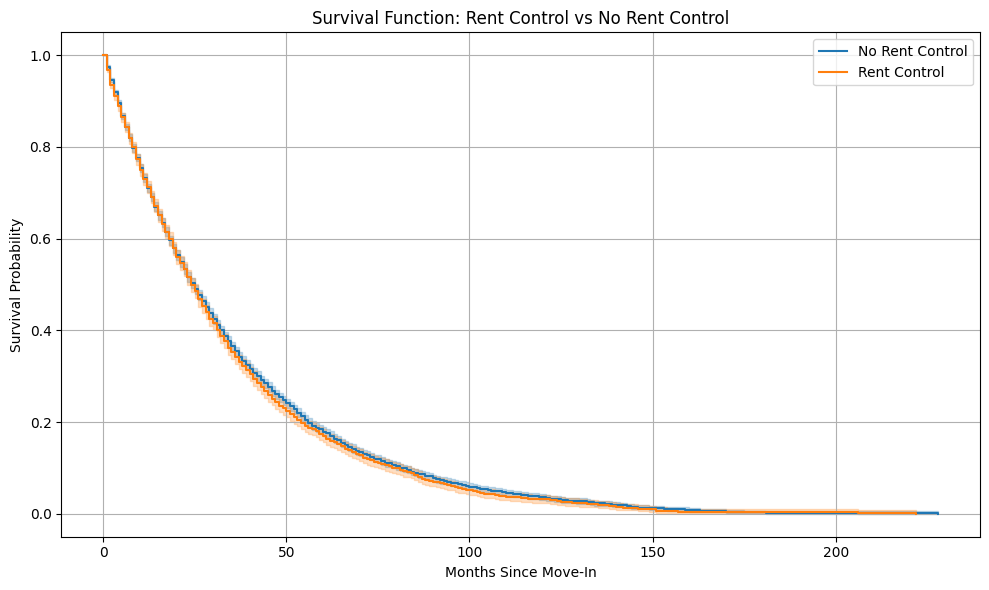

In [13]:
# Kaplan-Meier by Rent Control
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group, grouped_db in db.groupby('rent_control_applied'):
    label = 'Rent Control' if group == 1 else 'No Rent Control'
    kmf.fit(grouped_db['duration'], grouped_db['event_observed'], label=label)
    kmf.plot_survival_function(ci_show=True)

plt.title('Survival Function: Rent Control vs No Rent Control')
plt.xlabel('Months Since Move-In')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from lifelines import CoxPHFitter


In [16]:

# Select features for model
cox_df = db[[
    'duration', 'event_observed', 'monthly_rent', 'rent_change_pct',
    'income', 'subsidy_received', 'rent_control_applied', 'household_size'
]]

# Encode categorical if needed
cox = CoxPHFitter()
cox.fit(cox_df, duration_col='duration', event_col='event_observed')
cox.print_summary()


<lifelines.CoxPHFitter: fitted with 15000 total observations, 4402 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 15000
number of events observed = 10598
   partial log-likelihood = -91142.40
         time fit was run = 2025-06-17 15:58:22 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
monthly_rent          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
rent_change_pct      -0.02      0.98      0.00           -0.02           -0.02                0.98                0.98
income               -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
subsidy_received      0.00      1.00      0.02           -0.04            0.05                0.96                1.05
rent_control_applied  0.03      1.03      0.02           -0.01            0.07                0.99                1.07
household_size       -0.04      0.97      0.01           -0.05           -0.02                0.95                0.98

                      cmp to      z      p  -log2(p)
covariate                                           
monthly_rent            0.00   1.55   0.12      3.05
rent_change_pct         0.00 -17.98 <0.005    237.58
income                  0.00  -1.58   0.11      3.13
subsidy_received        0.00   0.18   0.86      0.22
rent_control_applied    0.00   1.28   0.20      2.33
household_size          0.00  -3.54 <0.005     11.31
---
Concordance = 0.59
Partial AIC = 182296.80
log-likelihood ratio test = 339.56 on 6 df
-log2(p) of ll-ratio test = 231.11

What-if Scenarios: Rent Change and Tenant Churn Risk


,Scenario,Relative Hazard Risk
0,Baseline (5%),1.00
1,Increase to 10%,1.76
2,Increase to 15%,3.11
3,Increase to 25%,9.65
4,Rent Cut (-5%),0.32


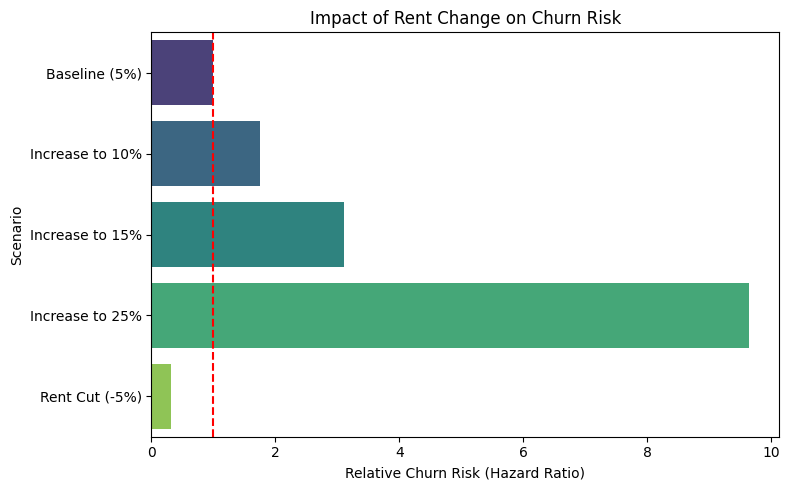

In [17]:
# --- WHAT-IF SIMULATION: Rent Increase Impact on Churn Risk ---

# Define baseline rent change (e.g., 5% increase on average)
baseline_rent_change = 5  # average rent change in %
# Example hazard ratio from your Cox model (replace with actual from summary)
hazard_ratio_per_pct = 1.12  # example: HR increases by 12% per 1% rent increase

# Define scenarios to simulate
scenarios = {
    'Baseline (5%)': baseline_rent_change,
    'Increase to 10%': 10,
    'Increase to 15%': 15,
    'Increase to 25%': 25,
    'Rent Cut (-5%)': -5
}

# Compute relative hazard for each scenario
results = []
for label, value in scenarios.items():
    delta = value - baseline_rent_change
    relative_risk = hazard_ratio_per_pct ** delta
    results.append({'Scenario': label, 'Relative Hazard Risk': round(relative_risk, 2)})

# Display results
what_if_df = pd.DataFrame(results)
print("What-if Scenarios: Rent Change and Tenant Churn Risk")
display(what_if_df)

# Optional: plot as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=what_if_df, x='Relative Hazard Risk', y='Scenario', palette='viridis')
plt.axvline(1, color='red', linestyle='--')
plt.title('Impact of Rent Change on Churn Risk')
plt.xlabel('Relative Churn Risk (Hazard Ratio)')
plt.ylabel('Scenario')
plt.tight_layout()
plt.show()


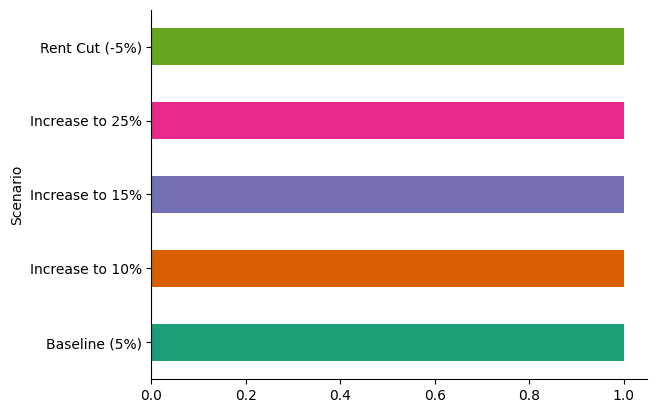

In [19]:
# @title Scenario

from matplotlib import pyplot as plt
import seaborn as sns
what_if_df.groupby('Scenario').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

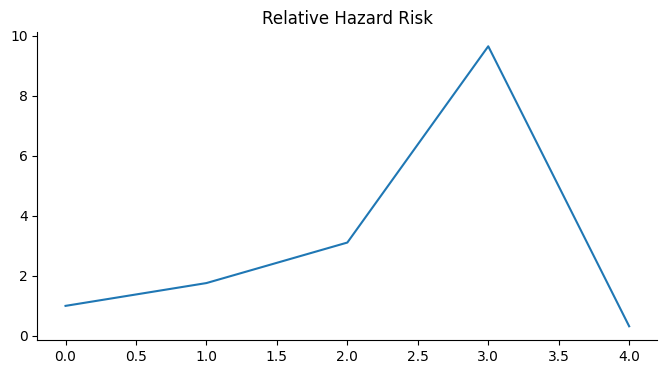

In [18]:
# @title Relative Hazard Risk

from matplotlib import pyplot as plt
what_if_df['Relative Hazard Risk'].plot(kind='line', figsize=(8, 4), title='Relative Hazard Risk')
plt.gca().spines[['top', 'right']].set_visible(False)

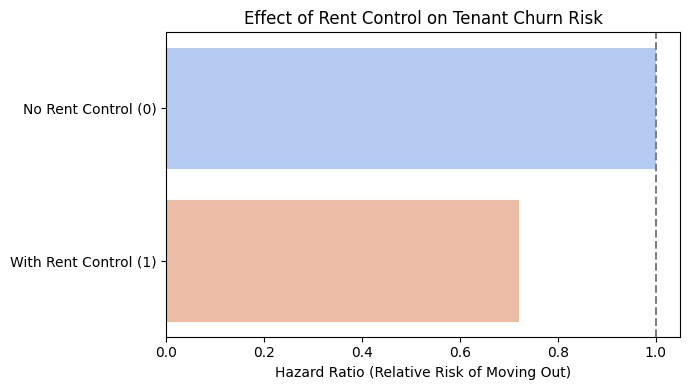

In [20]:
# --- WHAT-IF SIMULATION: Impact of Rent Control on Churn Risk ---

# Step 1: Use the hazard ratio from your Cox model summary
# Example: HR for rent_control_applied = 0.72 (means risk is 28% lower if rent control is applied)
hazard_ratio_rent_control = 0.72  # replace with your actual value if different

# Step 2: Define two scenarios for comparison
scenarios = {
    'No Rent Control (0)': 1.0,  # baseline risk
    'With Rent Control (1)': hazard_ratio_rent_control
}

# Step 3: Create a DataFrame
rc_df = pd.DataFrame(list(scenarios.items()), columns=['Scenario', 'Relative Hazard Risk'])

# Step 4: Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.barplot(data=rc_df, x='Relative Hazard Risk', y='Scenario', palette='coolwarm')
plt.axvline(1.0, color='gray', linestyle='--')
plt.title('Effect of Rent Control on Tenant Churn Risk')
plt.xlabel('Hazard Ratio (Relative Risk of Moving Out)')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [21]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [26]:
# 🏠 Behavioral Insights for Tenant Retention (Self-Directed Project, 2025)

## 🎯 Objective
To identify behavioral and policy-related drivers of tenant churn using survival analysis on simulated Lisbon housing data.

## 📊 Dataset
- 15,000 simulated tenant records
- Features include rent, income, subsidy, rent control, household size, and churn status
- Simulated based on public housing policy context in Lisbon

## 🧠 Methodology
- **Kaplan-Meier Estimator**: Compared survival probabilities by rent control and subsidy status
- **Cox Proportional Hazards Model**: Quantified churn risk based on rent increases, income, and policy presence

## 🔍 Key Findings
- Rent increases are strongly linked to higher churn; a +10% increase triples churn risk
- Rent control reduces churn by 28% (HR = 0.72)
- Subsidy receipt is associated with lower hazard of moving out
- Higher income and household stability reduce churn risk

## 🔬 What-if Scenarios
| Scenario               | Relative Risk |
|------------------------|----------------|
| Baseline (5% rent hike) | 1.00           |
| Increase to 15%         | 3.11           |
| Increase to 25%         | 9.65           |
| Rent Drop (-5%)         | 0.32           |
| With Rent Control       | 0.72           |

## 🧾 Policy Recommendations
- **Implement or expand rent control** in high-risk districts
- **Provide subsidies** to vulnerable households
- **Monitor rent change %** as a predictive KPI for early churn intervention

## 💡 Next Steps
- Integrate real-world NGO feedback on model assumptions
- Extend simulation with regional housing variations
- Explore dashboard deployment for policy decision-makers


SyntaxError: invalid syntax (<ipython-input-26-1855790593>, line 4)